# Modeling Cross Section Data with DT

In [1]:
import pandas as pd
import itertools
import numpy as np
import os
from joblib import dump
import time
from sklearn.neighbors import KNeighborsRegressor
import sys
from sklearn.model_selection import train_test_split

# This allows us to import the nucml utilities
sys.path.append("../..")

import nucml.exfor.data_utilities as exfor_utils 
import nucml.datasets as nuc_data 
import nucml.general_utilities as gen_utils
import nucml.model.utilities as model_utils
import nucml.exfor.plot as exfor_plot
import nucml.general_utilities as gen_utils

In [2]:
import importlib
importlib.reload(exfor_utils)
importlib.reload(gen_utils)
importlib.reload(nuc_data)
importlib.reload(gen_utils)
importlib.reload(exfor_plot)
print("Finish re-loading scripts.")

Finish re-loading scripts.


# Loading Training Results

In [3]:
results_b0 = pd.read_csv("dt_resultsB0.csv").sort_values(by="max_depth")
results_b1 = pd.read_csv("dt_resultsB1.csv").sort_values(by="max_depth")
results_b2 = pd.read_csv("dt_resultsB2.csv").sort_values(by="max_depth")
results_b3 = pd.read_csv("dt_resultsB3.csv").sort_values(by="max_depth")
results_b4 = pd.read_csv("dt_resultsB4.csv").sort_values(by="max_depth")

results_b0 = results_b0[results_b0.normalizer == "none"]

# Loading Best Models

In [4]:
best_b0 = model_utils.get_best_models_df(results_b0, keep_first=True)
best_b1 = model_utils.get_best_models_df(results_b1, keep_first=True)
best_b2 = model_utils.get_best_models_df(results_b2, keep_first=True)
best_b3 = model_utils.get_best_models_df(results_b3, keep_first=True)
best_b4 = model_utils.get_best_models_df(results_b4, keep_first=True)

In [5]:
b0_train_model = model_utils.load_model_and_scaler(best_b0.iloc[[0]], model_only=True)
b1_train_model = model_utils.load_model_and_scaler(best_b1.iloc[[0]], model_only=True)
b2_train_model = model_utils.load_model_and_scaler(best_b2.iloc[[0]], model_only=True)
b3_train_model = model_utils.load_model_and_scaler(best_b3.iloc[[0]], model_only=True)
b4_train_model = model_utils.load_model_and_scaler(best_b4.iloc[[0]], model_only=True)

In [6]:
b0_val_model = model_utils.load_model_and_scaler(best_b0.iloc[[1]], model_only=True)
b1_val_model = model_utils.load_model_and_scaler(best_b1.iloc[[1]], model_only=True)
b2_val_model = model_utils.load_model_and_scaler(best_b2.iloc[[1]], model_only=True)
b3_val_model = model_utils.load_model_and_scaler(best_b3.iloc[[1]], model_only=True)
b4_val_model = model_utils.load_model_and_scaler(best_b4.iloc[[1]], model_only=True)

# Loading EXFOR Data

In [7]:
df_b0, _, _, _, _, to_scale_b0, _ = nuc_data.load_exfor(pedro=True, basic=0, normalize=False)
# df_b1, _, _, _, _, to_scale_b1, _ = nuc_data.load_exfor(pedro=True, basic=1, normalize=False)
# df_b2, _, _, _, _, to_scale_b2, _ = nuc_data.load_exfor(pedro=True, basic=2, normalize=False)
# df_b3, _, _, _, _, to_scale_b3, _ = nuc_data.load_exfor(pedro=True, basic=3, normalize=False)
# df_b4, _, _, _, _, to_scale_b4, _ = nuc_data.load_exfor(pedro=True, basic=4, normalize=False)

INFO:root: MODE: neutrons
INFO:root: LOW ENERGY: True
INFO:root: LOG: True
INFO:root: BASIC: 0
INFO:root:Reading data from C:/Users/Pedro/Desktop/ML_Nuclear_Data/EXFOR/CSV_Files\EXFOR_neutrons/EXFOR_neutrons_MF3_AME_no_RawNaN.csv
INFO:root:Data read into dataframe with shape: (4184115, 8)
INFO:root:Splitting dataset into training and testing...
INFO:root:Normalizing dataset...
INFO:root:Fitting new scaler.


In [41]:
df_b0[(df_b0.Z == 74) & (df_b0.A == 184)].Element_Flag_I.value_counts()

0    20284
1    10475
Name: Element_Flag_I, dtype: int64

- U233
- U235
- U238
- Pu239
- Be
- W

# Tungsten (W)

In [ ]:
order_dict=  {"endf":3, "exfor_ml_original":2, "exfor_ml":4, "exfor_new":1}

In [166]:
w_b0 = exfor_utils.predicting_nuclear_xs_v2_no_norm(
    df_b1, 74, 184, 1, b1_train_model, show=True, save=True, nat_iso="N", order_dict=order_dict,
    path="figures/W/b1_W_nt.png", get_endf=True, log=True, save_both=True)

INFO:root:EVALUATION: Extracting data from C:/Users/Pedro/Desktop/ML_Nuclear_Data/Evaluated_Data\neutrons/W184/endfb8.0/tables/xs/n-W184-MT001.endfb8.0
INFO:root:EVALUATION: Converting MeV to eV...
INFO:root:EVALUATION: Converting mb to b...
INFO:root:EVALUATION: Finished. ENDF data contains 19568 datapoints.
INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (19576, 43)
INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (19576, 43)


In [158]:
w_b0 = exfor_utils.predicting_nuclear_xs_v2_no_norm(
    df_b1, 74, 184, 102, b1_train_model, show=True, save=True, nat_iso="I",
    path="figures/W/b1_W_ng.png", get_endf=True, log=True, save_both=True)

INFO:root:EVALUATION: Extracting data from C:/Users/Pedro/Desktop/ML_Nuclear_Data/Evaluated_Data\neutrons/W184/endfb8.0/tables/xs/n-W184-MT102.endfb8.0
INFO:root:EVALUATION: Converting MeV to eV...
INFO:root:EVALUATION: Converting mb to b...
C:\Users\Pedro\Anaconda3\envs\ml_gpu\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning:

divide by zero encountered in log10

INFO:root:EVALUATION: Finished. ENDF data contains 34673 datapoints.
INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (202, 43)
INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (202, 43)


# Beryllium

In [146]:
order_dict=  {"endf":3, "exfor_ml_original":2, "exfor_ml":4, "exfor_new":1}

be_b0 = exfor_utils.predicting_nuclear_xs_v2_no_norm(
    df_b1, 4, 9, 1, b1_train_model, show=False, save=True, nat_iso="I", order_dict=order_dict,
    path="figures/Be/b0_Be_nt.png", get_endf=True, log=True, save_both=True)

INFO:root:EVALUATION: Extracting data from C:/Users/Pedro/Desktop/ML_Nuclear_Data/Evaluated_Data\neutrons/Be009/endfb8.0/tables/xs/n-Be009-MT001.endfb8.0
INFO:root:EVALUATION: Converting MeV to eV...
INFO:root:EVALUATION: Converting mb to b...
INFO:root:EVALUATION: Finished. ENDF data contains 444 datapoints.
INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (35959, 43)
INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (35959, 43)


In [147]:
# be_b0 = exfor_utils.predicting_nuclear_xs_v2_no_norm(
#     df_b1, 4, 9, 1, b1_train_model, show=True, save=True, nat_iso="I",
#     path="figures/Be/b0_Be_nt.png", get_endf=True, log=True, save_both=True)

# Carbon

In [143]:
order_dict=  {"endf":3, "exfor_ml_original":2, "exfor_ml":4, "exfor_new":1}

c_b0 = exfor_utils.predicting_nuclear_xs_v2_no_norm(
    df_b0, 6, 12, 1, b0_train_model, show=False, save=True, nat_iso="I", order_dict=order_dict,
    path="Figures/C/b0_c12_nt.png", get_endf=True, log=True, save_both=True)

INFO:root:EVALUATION: Extracting data from C:/Users/Pedro/Desktop/ML_Nuclear_Data/Evaluated_Data\neutrons/C012/endfb8.0/tables/xs/n-C012-MT001.endfb8.0
INFO:root:EVALUATION: Converting MeV to eV...
INFO:root:EVALUATION: Converting mb to b...
INFO:root:EVALUATION: Finished. ENDF data contains 1338 datapoints.
INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (23448, 40)
INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (23448, 40)


In [144]:
order_dict=  {"endf":3, "exfor_ml_original":2, "exfor_ml":4, "exfor_new":1}

c_b0 = exfor_utils.predicting_nuclear_xs_v2_no_norm(
    df_b1, 6, 12, 1, b1_train_model, show=False, save=True, nat_iso="I", order_dict=order_dict,
    path="Figures/C/b1_c12_nt.png", get_endf=True, log=True, save_both=True)

INFO:root:EVALUATION: Extracting data from C:/Users/Pedro/Desktop/ML_Nuclear_Data/Evaluated_Data\neutrons/C012/endfb8.0/tables/xs/n-C012-MT001.endfb8.0
INFO:root:EVALUATION: Converting MeV to eV...
INFO:root:EVALUATION: Converting mb to b...
INFO:root:EVALUATION: Finished. ENDF data contains 1338 datapoints.
INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (23448, 43)
INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (23448, 43)


# Uranium Predictions

In [168]:
order_dict=  {"endf":3, "exfor_ml_original":2, "exfor_ml":4, "exfor_new":1}

c_b0 = exfor_utils.predicting_nuclear_xs_v2_no_norm(
    df_b1, 92, 233, 18, b1_train_model, show=False, save=True, nat_iso="I", order_dict=order_dict,
    path="Figures/U/b1_u233_nf.png", get_endf=True, log=True, save_both=True)

INFO:root:EVALUATION: Extracting data from C:/Users/Pedro/Desktop/ML_Nuclear_Data/Evaluated_Data\neutrons/U233/endfb8.0/tables/xs/n-U233-MT018.endfb8.0
INFO:root:EVALUATION: Converting MeV to eV...
INFO:root:EVALUATION: Converting mb to b...
INFO:root:EVALUATION: Finished. ENDF data contains 15345 datapoints.
INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (94567, 43)
INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (94567, 43)


INFO:root:EVALUATION: Extracting data from C:\Users\Pedro\Desktop\ML_Nuclear_Data\Evaluated_Data\neutrons/U233/endfb8.0/tables/xs/n-U233-MT018.endfb8.0
INFO:root:EVALUATION: Converting MeV to eV...
INFO:root:EVALUATION: Converting mb to b...
INFO:root:EVALUATION: Finished. ENDF data contains 15345 datapoints.
INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (94567, 40)
INFO:root:Extracting samples from dataframe.
INFO:root:Scaling dataset...
INFO:root:EXFOR extracted DataFrame has shape: (94567, 40)


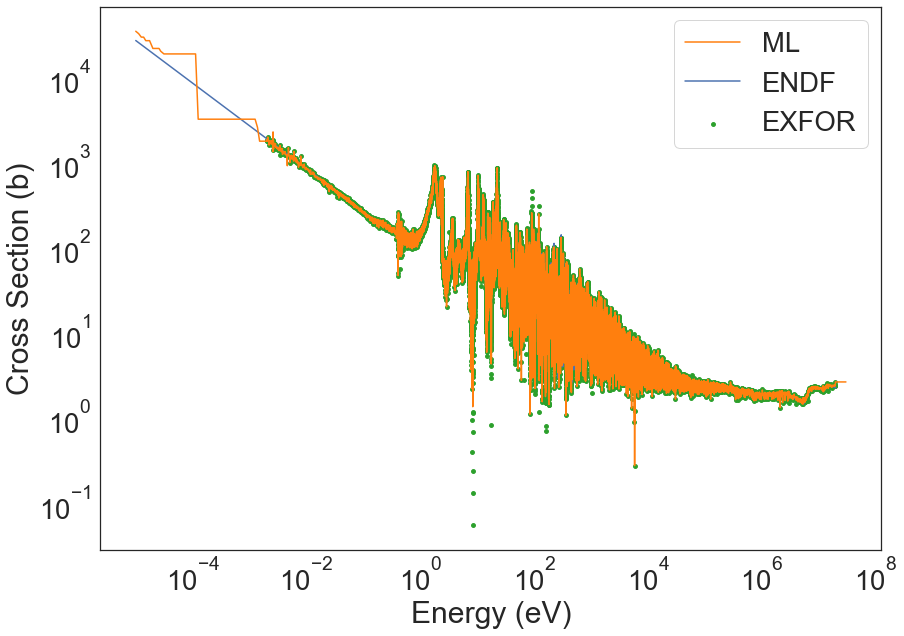

In [30]:
u_dt_b0 = exfor_utils.predicting_nuclear_xs_v2(
    df_b0, 92, 233, 18, b0_train_model, to_scale_b0, b0_train_scaler, show=True, save=True, 
    path="Figures/DT/B0_u233_fission.png", get_endf=True, log=True, save_both=True,
    plotter="plt", order_dict=order_dict)

# Chlorine

In [148]:
order_dict=  {"endf":3, "exfor_ml_original":2, "exfor_ml":4, "exfor_new":1}

c_b0 = exfor_utils.predicting_nuclear_xs_v2_no_norm(
    df_b0, 17, 35, 1, b0_train_model, show=False, save=True, nat_iso="I", order_dict=order_dict,
    path="Figures/CL/b0_Cl_nt.png", get_endf=True, log=True, save_both=True)

INFO:root:EVALUATION: Extracting data from C:/Users/Pedro/Desktop/ML_Nuclear_Data/Evaluated_Data\neutrons/Cl035/endfb8.0/tables/xs/n-Cl035-MT001.endfb8.0
INFO:root:EVALUATION: Converting MeV to eV...
INFO:root:EVALUATION: Converting mb to b...
INFO:root:EVALUATION: Finished. ENDF data contains 12359 datapoints.
INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (128, 40)
INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (128, 40)


In [8]:
new_cl_data_kwargs = {"Z":17, "A":35, "MT":103, "log":True, "scale":False, "one_hot":True}
new_cl_data_b0 = exfor_utils.load_newdata("../../EXFOR/New_Data/Chlorine_Data/new_cl_np.csv", df_b0, **new_cl_data_kwargs)
# new_cl_data_b1 = exfor_utils.load_newdata("../../EXFOR/New_Data/Chlorine_Data/new_cl_np.csv", df_b1, **new_cl_data_kwargs)
# new_cl_data_b2 = exfor_utils.load_newdata("../../EXFOR/New_Data/Chlorine_Data/new_cl_np.csv", df_b2, **new_cl_data_kwargs)
# new_cl_data_b3 = exfor_utils.load_newdata("../../EXFOR/New_Data/Chlorine_Data/new_cl_np.csv", df_b3, **new_cl_data_kwargs)
# new_cl_data_b4 = exfor_utils.load_newdata("../../EXFOR/New_Data/Chlorine_Data/new_cl_np.csv", df_b4, **new_cl_data_kwargs)

INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (215, 40)
INFO:root:EXFOR extracted DataFrame has shape: (12, 40)


In [149]:
def plot_chlorine(df, model, new_data, tag):
    cl_b0 = exfor_utils.predicting_nuclear_xs_v2_no_norm(
        df, 17, 35, 103, model, show=False, save=True, new_data=new_data,
        path="figures/Cl/{}_cl35_np.png".format(tag), get_endf=True, log=True, save_both=True)

def plot_chlorine_val(df, model, new_data, tag):
    cl_b0 = exfor_utils.predicting_nuclear_xs_v2_no_norm(
        df, 17, 35, 103, model, show=False, save=True, new_data=new_data,
        path="figures/Cl/{}_cl35_np_val.png".format(tag), get_endf=True, log=True, save_both=True)
    
# def plot_chlorine(df, model, new_data, tag):
#     cl_b0 = exfor_utils.predicting_nuclear_xs_v2_no_norm(
#         df, 17, 35, 1, model, show=False, save=True,
#         path="figures/Cl/{}_cl35_nt.png".format(tag), get_endf=True, log=True, save_both=True)

# def plot_chlorine_val(df, model, new_data, tag):
#     cl_b0 = exfor_utils.predicting_nuclear_xs_v2_no_norm(
#         df, 17, 35, 1, model, show=False, save=True,
#         path="figures/Cl/{}_cl35_nt_val.png".format(tag), get_endf=True, log=True, save_both=True)
    
for df, model, new_data, tag in zip([df_b0, df_b1, df_b2, df_b3, df_b4], 
                                    [b0_train_model, b1_train_model, b2_train_model, b3_train_model, b4_train_model], 
                                    [new_cl_data_b0, new_cl_data_b1, new_cl_data_b2, new_cl_data_b3, new_cl_data_b4], 
                                    ['b0', 'b1', 'b2', 'b3', 'b4']):
    plot_chlorine(df, model, new_data, tag)

INFO:root:EVALUATION: Extracting data from C:/Users/Pedro/Desktop/ML_Nuclear_Data/Evaluated_Data\neutrons/Cl035/endfb8.0/tables/xs/n-Cl035-MT001.endfb8.0
INFO:root:EVALUATION: Converting MeV to eV...
INFO:root:EVALUATION: Converting mb to b...
INFO:root:EVALUATION: Finished. ENDF data contains 12359 datapoints.
INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (128, 40)
INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (128, 40)
INFO:root:EVALUATION: Extracting data from C:/Users/Pedro/Desktop/ML_Nuclear_Data/Evaluated_Data\neutrons/Cl035/endfb8.0/tables/xs/n-Cl035-MT001.endfb8.0
INFO:root:EVALUATION: Converting MeV to eV...
INFO:root:EVALUATION: Converting mb to b...
INFO:root:EVALUATION: Finished. ENDF data contains 12359 datapoints.
INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (128, 43)
INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extract

In [150]:
for df, model, new_data, tag in zip([df_b0, df_b1, df_b2, df_b3, df_b4], 
                                    [b0_val_model, b1_val_model, b2_val_model, b3_val_model, b4_val_model], 
                                    [new_cl_data_b0, new_cl_data_b1, new_cl_data_b2, new_cl_data_b3, new_cl_data_b4], 
                                    ['b0', 'b1', 'b2', 'b3', 'b4']):
    plot_chlorine_val(df, model, new_data, tag)

INFO:root:EVALUATION: Extracting data from C:/Users/Pedro/Desktop/ML_Nuclear_Data/Evaluated_Data\neutrons/Cl035/endfb8.0/tables/xs/n-Cl035-MT001.endfb8.0
INFO:root:EVALUATION: Converting MeV to eV...
INFO:root:EVALUATION: Converting mb to b...
INFO:root:EVALUATION: Finished. ENDF data contains 12359 datapoints.
INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (128, 40)
INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (128, 40)
INFO:root:EVALUATION: Extracting data from C:/Users/Pedro/Desktop/ML_Nuclear_Data/Evaluated_Data\neutrons/Cl035/endfb8.0/tables/xs/n-Cl035-MT001.endfb8.0
INFO:root:EVALUATION: Converting MeV to eV...
INFO:root:EVALUATION: Converting mb to b...
INFO:root:EVALUATION: Finished. ENDF data contains 12359 datapoints.
INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (128, 43)
INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extract

In [88]:
cl_b1 = exfor_utils.predicting_nuclear_xs_v2_no_norm(
    df_b1, 17, 35, 103, b1_train_model, show=False, save=False, new_data=new_cl_data_b1,
    path="Figures/DT_B0/b1_cl35_np.png", get_endf=True, log=True, save_both=True)

INFO:root:EVALUATION: Extracting data from C:/Users/Pedro/Desktop/ML_Nuclear_Data/Evaluated_Data\neutrons/Cl035/endfb8.0/tables/xs/n-Cl035-MT103.endfb8.0
INFO:root:EVALUATION: Converting MeV to eV...
INFO:root:EVALUATION: Converting mb to b...
INFO:root:EVALUATION: Finished. ENDF data contains 8791 datapoints.
INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (215, 43)
INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (215, 43)


In [131]:
for_latex = pd.DataFrame(columns=["Energy", "Data", "DT"])

for_latex["Energy"] = 10**new_cl_data_b1.Energy.values
for_latex["Data"] = 10**new_cl_data_b1.Data.values
# for_latex["DT"] = 10**new_cl_data_b1.Data.values - 10**b1_train_model.predict(new_cl_data_b1.drop(columns=["Data"]))
for_latex["DT"] = 10**b1_train_model.predict(new_cl_data_b1.drop(columns=["Data"]))
for_latex['ENDF'] = 10**cl_b1['exfor_endf_new'].ENDF

In [93]:
cl_b1['error_metrics']

id       mae       mse       evs     mae_m         r2
0               EXFOR VS ML  0.031891  0.027326  0.974985  0.000000   0.974957
0    EXFOR VS ML (NEW DATA)  0.445259  0.229909 -0.524704  0.524206 -10.074324
0             EXFOR VS ENDF  0.716470  1.165566  0.292775  0.338363  -0.068151
0  EXFOR VS ENDF (NEW DATA)  0.749091  0.579751  0.103372  0.778482 -26.925600

In [95]:
10**cl_b1['exfor_ml_new']['predictions']

array([0.082     , 0.082     , 0.091     , 0.091     , 0.07830709,
       0.07830709, 0.07      , 0.07      , 0.101     , 0.101     ,
       0.101     , 0.101     ])

In [122]:
for_latex

Energy    Data        DT      ENDF
0   2420000.0  0.0166  0.082000  0.164866
1   2420000.0  0.0196  0.082000  0.163792
2   2520000.0  0.0261  0.091000  0.171915
3   2520000.0  0.0257  0.091000  0.170763
4   2580000.0  0.0446  0.078307  0.174243
5   2580000.0  0.0417  0.078307  0.173075
6   2640000.0  0.0500  0.070000  0.176602
7   2640000.0  0.0478  0.070000  0.175418
8   2740000.0  0.0284  0.101000  0.177794
9   2740000.0  0.0281  0.101000  0.178993
10  2740000.0  0.0315  0.101000  0.181417
11  2740000.0  0.0324  0.101000  0.180201

In [136]:
print(for_latex.to_latex(index=False))

\begin{tabular}{rrrr}
\toprule
   Energy &   Data &       DT &     ENDF \\
\midrule
2420000.0 & 0.0166 & 0.082000 & 0.164866 \\
2420000.0 & 0.0196 & 0.082000 & 0.163792 \\
2520000.0 & 0.0261 & 0.091000 & 0.171915 \\
2520000.0 & 0.0257 & 0.091000 & 0.170763 \\
2580000.0 & 0.0446 & 0.078307 & 0.174243 \\
2580000.0 & 0.0417 & 0.078307 & 0.173075 \\
2640000.0 & 0.0500 & 0.070000 & 0.176602 \\
2640000.0 & 0.0478 & 0.070000 & 0.175418 \\
2740000.0 & 0.0284 & 0.101000 & 0.177794 \\
2740000.0 & 0.0281 & 0.101000 & 0.178993 \\
2740000.0 & 0.0315 & 0.101000 & 0.181417 \\
2740000.0 & 0.0324 & 0.101000 & 0.180201 \\
\bottomrule
\end{tabular}



In [133]:
import sklearn.metrics as metrics

In [134]:
metrics.median_absolute_error(for_latex.Data, for_latex.DT)

0.06510000000000002

In [135]:
metrics.median_absolute_error(for_latex.Data, for_latex.ENDF)

0.1454386171394206

In [44]:
def make_chlorine_paper_figure(df, dt_model, dt_scaler, knn_model, knn_scaler, to_scale, endf_cl, e_array, saving_dir=None):
    
    fig, (ax1, ax2) = plt.subplots(2, figsize=(30,20))

    kwargs = {"nat_iso": "I", "one_hot": True, "scale": True, "to_scale": to_scale}

    chlorine_data_dt = exfor_utils.load_samples(df, 17, 35, "MT_103", scaler=dt_scaler, **kwargs)
    chlorine_data_knn = exfor_utils.load_samples(df, 17, 35, "MT_103", scaler=knn_scaler, **kwargs)
    
    
    new_cl_data_kwargs = {"Z":17, "A":35, "MT":"MT_103", "log":True, "scale":True, "to_scale":to_scale, "one_hot":True}
    new_data_knn = exfor_utils.load_newdata(
        "../EXFOR/New_Data/Chlorine_Data/new_cl_np.csv", df, scaler=knn_scaler, **new_cl_data_kwargs)
    new_data_dt = exfor_utils.load_newdata(
        "../EXFOR/New_Data/Chlorine_Data/new_cl_np.csv", df, scaler=dt_scaler, **new_cl_data_kwargs)
    
    chlorine_data_ext = exfor_utils.expanding_dataset_energy(chlorine_data_dt, 0, 0, False, 0, e_array=e_array)
    chlorine_data_ext = chlorine_data_ext[chlorine_data_ext.Energy > chlorine_data_dt.Energy.min()]
    
    ax1.plot(10**(chlorine_data_ext.Energy), 10**(dt_model.predict(chlorine_data_ext.drop(columns=["Data"]))), label="DT", linestyle="dashed", c="firebrick", linewidth=3)
    ax1.scatter(10**(chlorine_data_dt.Energy), 10**(chlorine_data_dt.Data), alpha=0.5, c='#1f77b4', label="EXFOR")
    ax1.scatter(10**(new_data_dt.Energy), 10**(new_data_dt.Data), alpha=1, c='#ff7f0e', s=250, marker="x", label="J.C.Batchelder (2019)")
    ax1.plot(10**(endf_cl.Energy), 10**(endf_cl.Data), alpha=0.5, c="orange", label="ENDF")
    ax1.legend(loc=3)

    chlorine_data_ext = exfor_utils.expanding_dataset_energy(chlorine_data_knn, 0, 0, False, 0, e_array=e_array)
    chlorine_data_ext = chlorine_data_ext[chlorine_data_ext.Energy > chlorine_data_knn.Energy.min()]
    
    ax2.plot(10**(chlorine_data_ext.Energy), 10**(knn_model.predict(chlorine_data_ext.drop(columns=["Data"]))), label="KNN", linestyle="dashed", c="firebrick", linewidth=3)
    ax2.scatter(10**(chlorine_data_knn.Energy), 10**(chlorine_data_knn.Data), alpha=0.5, c='#1f77b4', label="EXFOR")
    ax2.scatter(10**(new_data_knn.Energy), 10**(new_data_knn.Data), alpha=1, s=250, c='#ff7f0e', marker="x", label="J.C.Batchelder (2019)")
    ax2.plot(10**(endf_cl.Energy), 10**(endf_cl.Data), alpha=0.5, c="orange", label="ENDF")
    ax2.legend(loc=3)

    ax1.set(ylabel='Cross Section (b)')
    ax2.set(ylabel='Cross Section (b)')
    
    ax1.set(xlabel='Energy (eV)') 
    ax2.set(xlabel='Energy (eV)') 
    
    ax1.set_xscale('log')
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax1.set_yscale('log')
    ax1.set_xlim(10**-2, 10**7.5)
    ax2.set_xlim(10**-2, 10**7.5)

#     fig.text(0.5, 0.04, 'Energy (eV)', ha='center')
#     fig.text(0.04, 0.5, 'Cross Section (b)', va='center', rotation='vertical')
#     # plt.tight_layout()
#     plt.tight_layout(w_pad=5.5, h_pad=5.0)
    
    plt.savefig(os.path.join(saving_dir, "ML_Cl.png"), dpi=600, bbox_inches="tight")

INFO:root:Extracting samples from dataframe.
INFO:root:Scaling dataset...
INFO:root:EXFOR extracted DataFrame has shape: (215, 40)
INFO:root:Extracting samples from dataframe.
INFO:root:Scaling dataset...
INFO:root:EXFOR extracted DataFrame has shape: (215, 40)
INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (215, 40)
INFO:root:Scaling dataset...
INFO:root:EXFOR extracted DataFrame has shape: (12, 40)
INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (215, 40)
INFO:root:Scaling dataset...
INFO:root:EXFOR extracted DataFrame has shape: (12, 40)


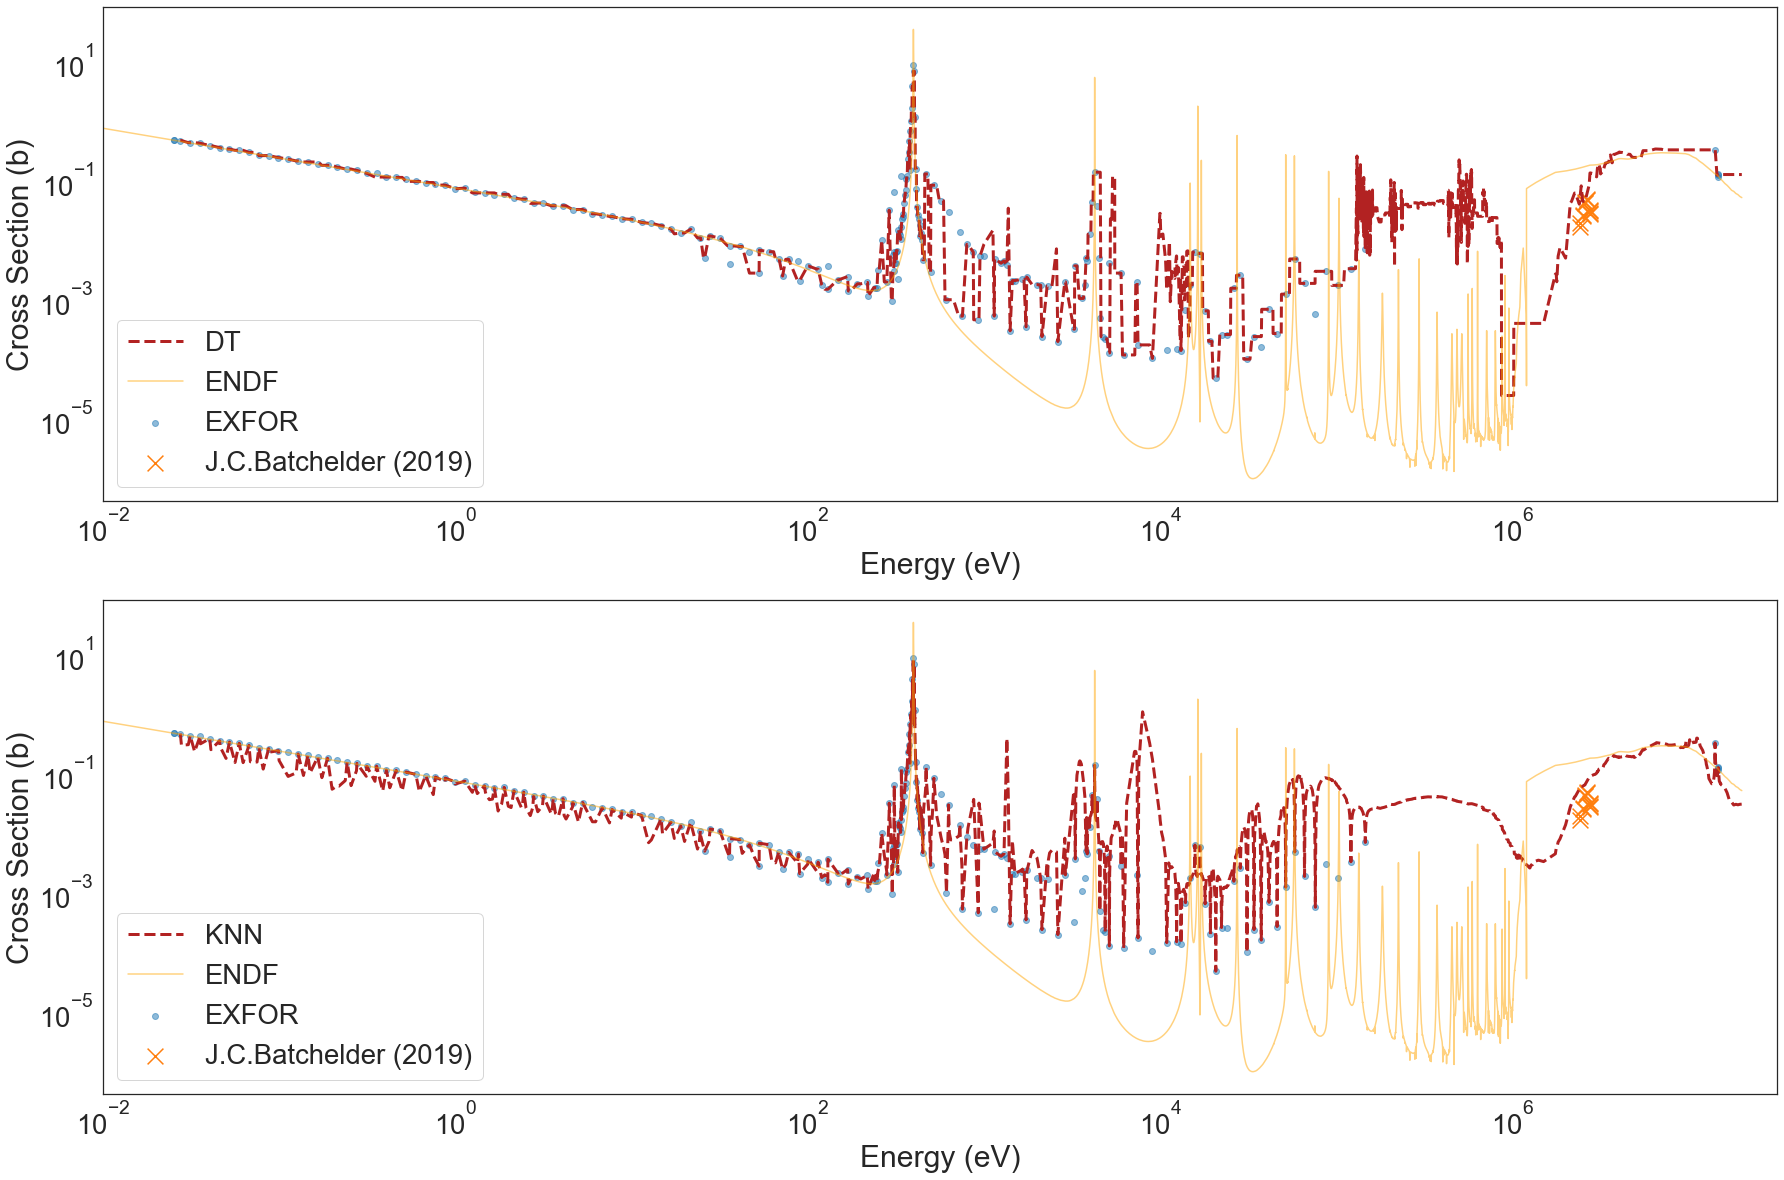

In [41]:
make_chlorine_paper_figure(df, dt_train_model, dt_train_scaler, knn_train_model, knn_train_scaler,
                           to_scale, endf_cl, ace_cl, saving_dir=figure_dir)